# Klasifikasi Risiko Diabetes Berdasarkan Indikator Kesehatan Populasi Menggunakan Machine Learning

# Pendahuluan

Diabetes mellitus merupakan salah satu penyakit tidak menular yang menjadi penyebab utama kematian dan kecacatan di seluruh dunia. Penyakit ini ditandai oleh kadar glukosa darah yang tinggi akibat gangguan produksi atau efektivitas insulin. Menurut data dari World Health Organization (WHO), jumlah penderita diabetes terus meningkat setiap tahunnya, termasuk di negara maju seperti Amerika Serikat.

Untuk memantau kondisi kesehatan masyarakat, Centers for Disease Control and Prevention (CDC) secara rutin melakukan survei kesehatan melalui program Behavioral Risk Factor Surveillance System (BRFSS). Salah satu dataset yang dihasilkan adalah CDC Diabetes Health Indicators, yang berisi informasi mengenai lebih dari 250.000 responden dewasa di Amerika Serikat. Dataset ini mencakup berbagai indikator kesehatan seperti indeks massa tubuh (BMI), aktivitas fisik, kebiasaan merokok, konsumsi alkohol, serta kondisi kronis lainnya seperti tekanan darah tinggi dan kolesterol tinggi.

Dengan semakin berkembangnya metode data mining dan machine learning, analisis terhadap data kesehatan masyarakat seperti ini dapat memberikan wawasan berharga dalam mendeteksi dini risiko diabetes, memahami pola distribusinya, serta merumuskan intervensi yang lebih efektif. Melalui pendekatan klasifikasi, kita dapat membangun model prediksi yang memanfaatkan indikator-indikator tersebut untuk mengidentifikasi individu yang berisiko tinggi menderita diabetes.

# Data Understanding

## Sumber data

Dataset ini mengambil dari link dibawah :

https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators


Kumpulan Data Indikator Kesehatan Diabetes berisi statistik perawatan kesehatan dan informasi survei gaya hidup tentang orang-orang pada umumnya beserta diagnosis diabetes mereka. Ke-35 fitur tersebut terdiri dari beberapa demografi, hasil uji lab, dan jawaban atas pertanyaan survei untuk setiap pasien. Variabel target untuk klasifikasi adalah apakah pasien menderita diabetes, pradiabetes, atau sehat.

## Tujuan Penelitian
Penelitian ini bertujuan untuk:

Menganalisis hubungan antara indikator kesehatan masyarakat (seperti BMI, tekanan darah tinggi, kolesterol tinggi, kebiasaan merokok, aktivitas fisik, dan konsumsi alkohol) terhadap status diabetes responden berdasarkan data survei CDC.

## Integrasi data
Integrasi data merupakan tahap awal dalam proses penambangan data yang bertujuan untuk menggabungkan dan menyelaraskan data dari berbagai sumber atau atribut agar dapat digunakan dalam proses analisis dan pemodelan. Pada penelitian ini, data yang digunakan berasal dari dataset CDC Diabetes Health Indicators yang tersedia dalam format CSV dan mencakup lebih dari 250.000 entri responden dari survei kesehatan masyarakat di Amerika Serikat.



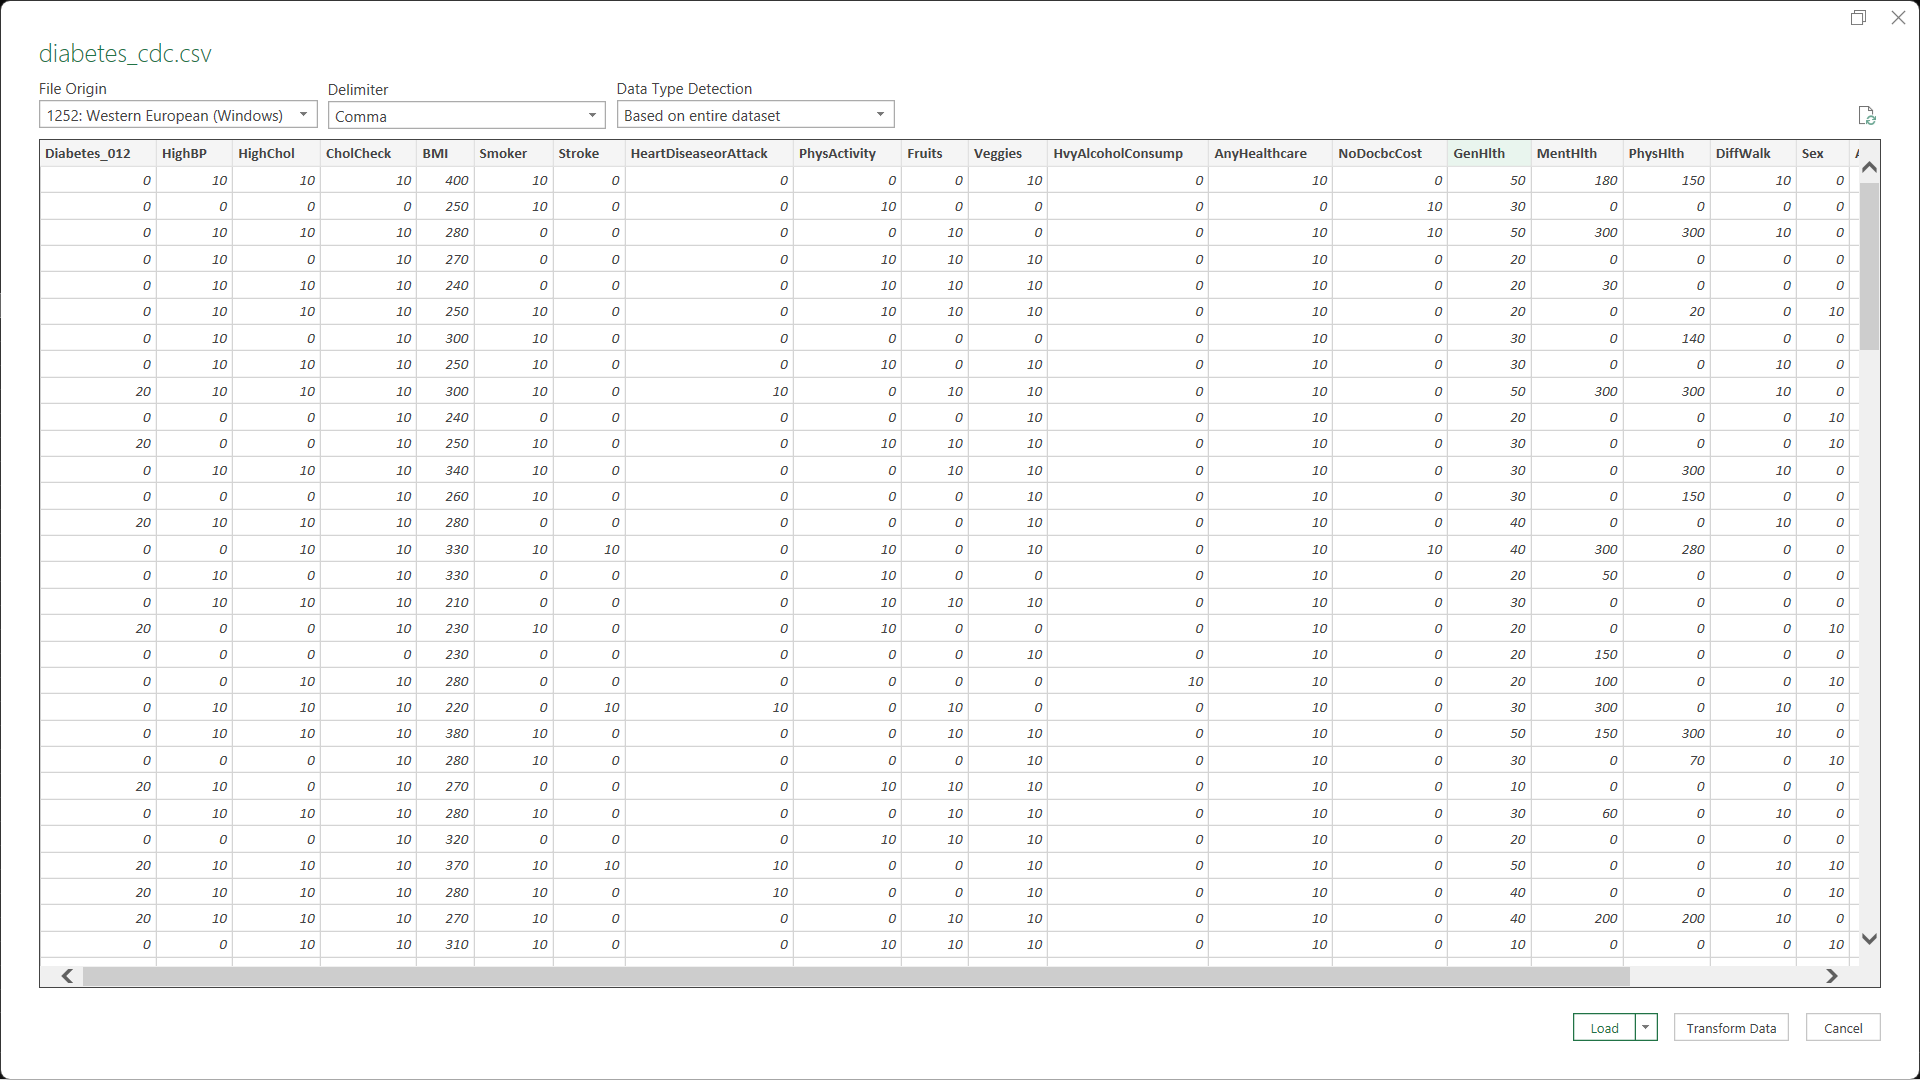

## Penjelasan Fitur / Variabel

| Nama Variabel          | Deskripsi Singkat                                                         |
| ---------------------- | ------------------------------------------------------------------------- |
| `Diabetes`             | Status diabetes responden (Yes, No, Borderline, During pregnancy)         |
| `HighBP`               | Tekanan darah tinggi (1 = ya, 0 = tidak)                                  |
| `HighChol`             | Kolesterol tinggi (1 = ya, 0 = tidak)                                     |
| `CholCheck`            | Pernah cek kolesterol dalam 5 tahun terakhir (1 = ya, 0 = tidak)          |
| `BMI`                  | Indeks massa tubuh (nilai numerik)                                        |
| `Smoker`               | Pernah merokok minimal 100 batang (1 = ya, 0 = tidak)                     |
| `Stroke`               | Pernah mengalami stroke (1 = ya, 0 = tidak)                               |
| `HeartDiseaseorAttack` | Pernah serangan jantung atau penyakit jantung koroner (1 = ya, 0 = tidak) |
| `PhysActivity`         | Melakukan aktivitas fisik dalam 30 hari terakhir (1 = ya, 0 = tidak)      |
| `Fruits`               | Mengonsumsi buah minimal 1 kali sehari (1 = ya, 0 = tidak)                |
| `Veggies`              | Mengonsumsi sayur minimal 1 kali sehari (1 = ya, 0 = tidak)               |
| `HvyAlcoholConsump`    | Konsumsi alkohol berat (>14 kali/minggu) (1 = ya, 0 = tidak)              |
| `AnyHealthcare`        | Memiliki asuransi/kartu layanan kesehatan (1 = ya, 0 = tidak)             |
| `NoDocbcCost`          | Tidak pergi ke dokter karena biaya (1 = ya, 0 = tidak)                    |
| `GenHlth`              | Penilaian kesehatan umum (1 = sangat baik, 5 = sangat buruk)              |
| `MentHlth`             | Jumlah hari dalam 30 hari terakhir merasa terganggu secara mental (0–30)  |
| `PhysHlth`             | Jumlah hari dalam 30 hari terakhir merasa terganggu secara fisik (0–30)   |
| `DiffWalk`             | Kesulitan berjalan atau menaiki tangga (1 = ya, 0 = tidak)                |
| `Sex`                  | Jenis kelamin (1 = pria, 0 = wanita)                                      |
| `Age`                  | Kelompok usia (kode numerik: 1 = 18-24, 2 = 25-29, ..., 13 = >80 tahun)   |
| `Education`            | Pendidikan terakhir (1 = tidak lulus SD, ..., 6 = sarjana)                |
| `Income`               | Kategori pendapatan (1 = < \$10k, ..., 8 = > \$75k)                       |


## Eksplorasi Data

Sebelum memulai proses modeling, dilakukan eksplorasi awal terhadap kualitas data untuk memastikan data dalam kondisi siap pakai. Dari hasil pemeriksaan, tidak ditemukan nilai kosong (missing value) secara eksplisit di dataset, namun beberapa kolom seperti MentHlth dan PhysHlth menunjukkan kemungkinan nilai tidak wajar, misalnya angka melebihi 30 hari dalam sebulan. Selain itu, pemeriksaan nilai unik juga penting untuk mendeteksi placeholder seperti 88, 99, atau 999 yang sering digunakan dalam survei untuk menandakan “tidak tahu” atau “tidak menjawab”. Tipe data juga dikonfirmasi sudah sesuai; sebagian besar kolom bertipe numerik dan biner, dengan beberapa perlu dikonversi ke kategori jika diperlukan.

Deteksi outlier dilakukan pada beberapa kolom numerik utama seperti BMI, MentHlth, dan PhysHlth. Hasil analisis menggunakan metode IQR menunjukkan bahwa kolom BMI memiliki sejumlah nilai yang signifikan lebih tinggi dari nilai normal, misalnya di atas 60. Hal ini perlu diperhatikan karena dapat mempengaruhi performa model klasifikasi berbasis jarak atau statistik. Sementara itu, distribusi kelas target Diabetes terlihat tidak seimbang, di mana mayoritas data berasal dari kelas “No”, dan sisanya tersebar di kelas “Yes”, “Borderline”, serta “During pregnancy”. Distribusi ini mengindikasikan perlunya penyesuaian seperti class balancing sebelum model dibangun, agar model tidak bias terhadap kelas mayoritas.

In [1]:
import pandas as pd

# Load dataset
df = pd.read_csv("diabetes_cdc.csv")

### 1. Missing Value Check
print("=== Missing Values per Kolom ===")
print(df.isnull().sum())

### 2. Nilai Unik (deteksi nilai tidak wajar)
print("\n=== Nilai Unik untuk Pemeriksaan Anomali ===")
for col in df.columns:
    print(f"{col}: {df[col].unique()[:10]}")  # max 10 contoh

### 3. Deteksi Outlier dengan IQR
def detect_outlier_iqr(column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[column] < Q1 - 1.5*IQR) | (df[column] > Q3 + 1.5*IQR)]
    print(f"Outlier pada kolom {column}: {len(outliers)} data")
    return outliers

print("\n=== Outlier Detection ===")
for col in ["BMI", "MentHlth", "PhysHlth"]:
    detect_outlier_iqr(col)

### 4. Cek Tipe Data
print("\n=== Tipe Data Tiap Kolom ===")
print(df.dtypes)

### 5. Distribusi Kelas (Tanpa Visualisasi)
print("\n=== Distribusi Label Target Diabetes_012 ===")
print(df["Diabetes_012"].value_counts())

### 6. Konversi Label Biner
df["Diabetes_binary"] = df["Diabetes_012"].apply(lambda x: 1 if x == 1 else 0)
print("\n=== Distribusi Label Biner (Diabetes_binary) ===")
print(df["Diabetes_binary"].value_counts())


=== Missing Values per Kolom ===
Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

=== Nilai Unik untuk Pemeriksaan Anomali ===
Diabetes_012: [0. 2. 1.]
HighBP: [1. 0.]
HighChol: [1. 0.]
CholCheck: [1. 0.]
BMI: [40. 25. 28. 27. 24. 30. 34. 26. 33. 21.]
Smoker: [1. 0.]
Stroke: [0. 1.]
HeartDiseaseorAttack: [0. 1.]
PhysActivity: [0. 1.]
Fruits: [0. 1.]
Veggies: [1. 0.]
HvyAlcoholConsump: [0. 1.]
AnyHealthcare: [1. 0.]
NoDocbcCost: [0. 1.]
GenHlth: [5. 3. 2. 4. 1

## Visualisasi data
Visualisasi data dilakukan untuk memahami distribusi serta pola dari fitur-fitur utama dalam dataset. Langkah pertama adalah memvisualisasikan outlier pada kolom BMI menggunakan boxplot. Dari grafik tersebut terlihat bahwa terdapat sejumlah nilai BMI yang berada di atas rentang normal (misalnya >50), yang menunjukkan keberadaan outlier. Meskipun demikian, nilai-nilai ini masih masuk akal secara klinis, karena obesitas ekstrem memang merupakan faktor risiko nyata bagi diabetes. Oleh karena itu, outlier tersebut tidak langsung dihapus, tetapi dicatat sebagai temuan penting.

Selanjutnya, visualisasi distribusi kelas target Diabetes_012 menunjukkan bahwa sebagian besar responden berada pada kategori 0 (tidak diabetes), disusul oleh 1 (diabetes), dan jumlah terkecil adalah 2 (borderline diabetes). Ketidakseimbangan ini juga tampak pada grafik distribusi label biner (Diabetes_binary), di mana mayoritas responden bukan penderita diabetes. Temuan ini penting karena dapat memengaruhi performa model klasifikasi; model cenderung bias terhadap kelas mayoritas jika tidak dilakukan penanganan seperti balancing data. Terakhir, ditampilkan heatmap korelasi antar fitur numerik yang menunjukkan beberapa hubungan positif yang cukup kuat, seperti antara tekanan darah tinggi dan kolesterol tinggi, atau antara kesulitan berjalan dengan kesehatan fisik yang buruk. Visualisasi ini membantu dalam memahami struktur antar fitur dan dapat digunakan untuk seleksi fitur pada tahap modeling.

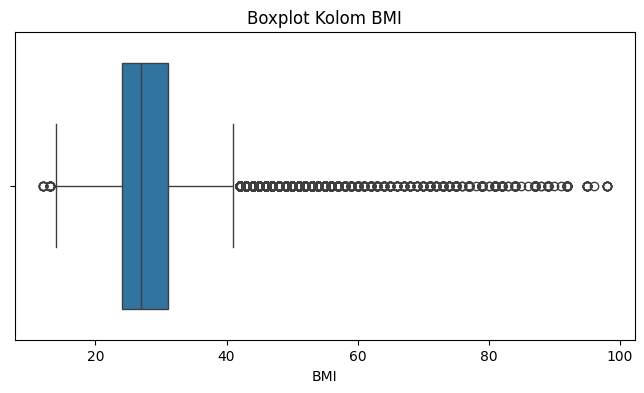

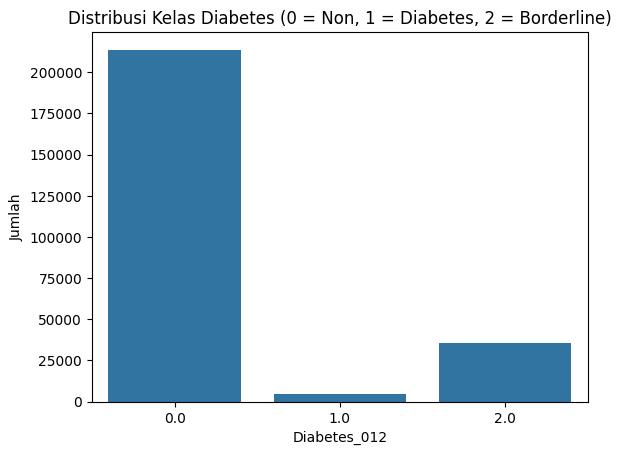

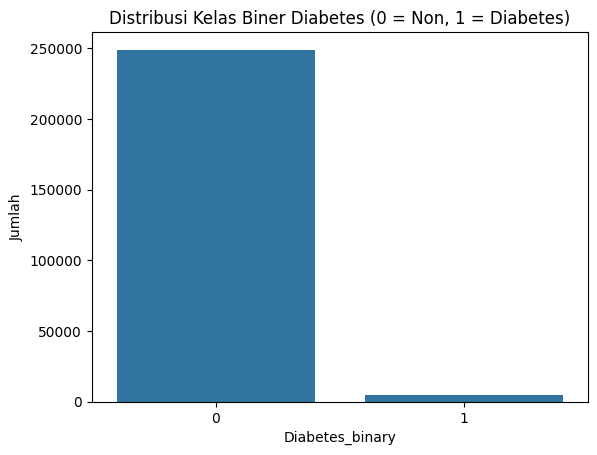

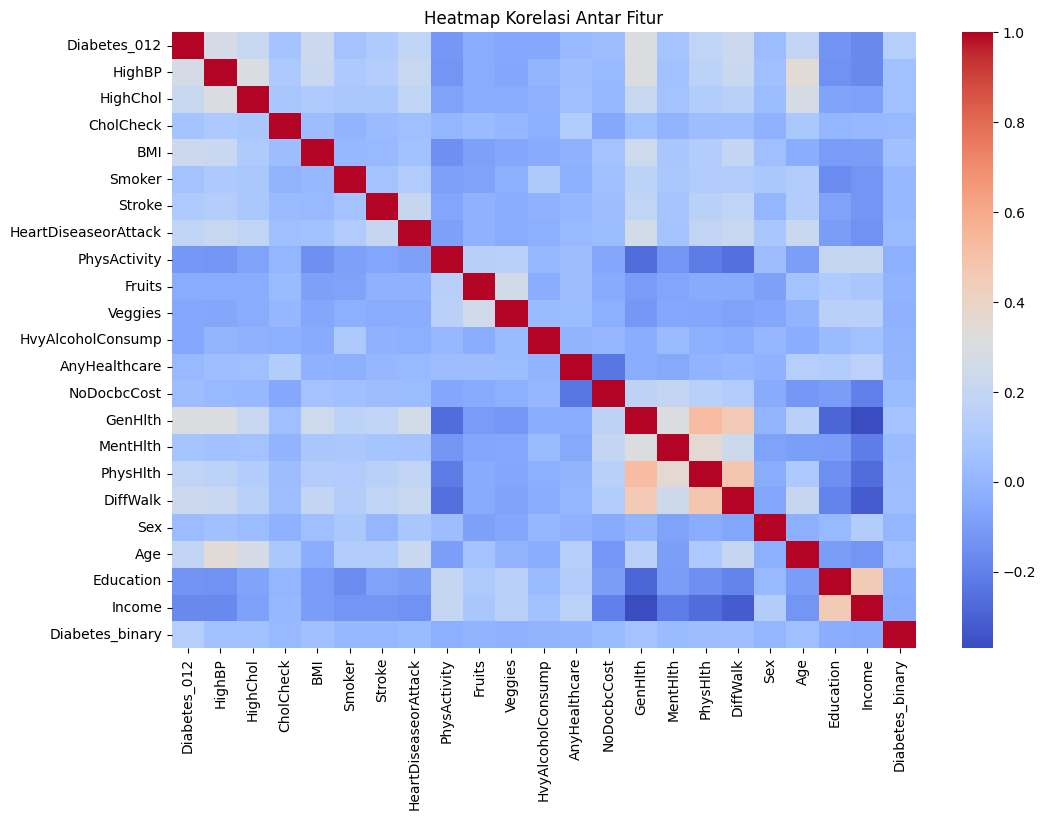

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Boxplot BMI (Outlier)
plt.figure(figsize=(8, 4))
sns.boxplot(x=df["BMI"])
plt.title("Boxplot Kolom BMI")
plt.show()

### 2. Distribusi Label Multikelas
sns.countplot(x="Diabetes_012", data=df)
plt.title("Distribusi Kelas Diabetes (0 = Non, 1 = Diabetes, 2 = Borderline)")
plt.xlabel("Diabetes_012")
plt.ylabel("Jumlah")
plt.show()

### 3. Distribusi Label Biner
sns.countplot(x="Diabetes_binary", data=df)
plt.title("Distribusi Kelas Biner Diabetes (0 = Non, 1 = Diabetes)")
plt.xlabel("Diabetes_binary")
plt.ylabel("Jumlah")
plt.show()

### (Opsional) Korelasi Fitur Numerik
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), cmap="coolwarm", annot=False)
plt.title("Heatmap Korelasi Antar Fitur")
plt.show()


# Preprocessing Data

## Encoding Kategorical
Langkah pertama dalam preprocessing adalah mengonversi fitur kategorikal biner yang awalnya bertipe float64 menjadi int. Hal ini dilakukan agar fitur tersebut diperlakukan sesuai dengan maknanya sebagai data diskrit (kategori), bukan sebagai data kontinu, terutama ketika digunakan dalam pemodelan atau visualisasi

In [3]:
# Konversi kolom kategorikal ke integer
categorical_cols = ["HighBP", "HighChol", "CholCheck", "Smoker", "Stroke",
                    "HeartDiseaseorAttack", "PhysActivity", "Fruits",
                    "Veggies", "HvyAlcoholConsump", "AnyHealthcare",
                    "NoDocbcCost", "DiffWalk", "Sex"]

df[categorical_cols] = df[categorical_cols].astype(int)

# Output
print("Tipe data setelah encoding:\n", df[categorical_cols].dtypes)


Tipe data setelah encoding:
 HighBP                  int64
HighChol                int64
CholCheck               int64
Smoker                  int64
Stroke                  int64
HeartDiseaseorAttack    int64
PhysActivity            int64
Fruits                  int64
Veggies                 int64
HvyAlcoholConsump       int64
AnyHealthcare           int64
NoDocbcCost             int64
DiffWalk                int64
Sex                     int64
dtype: object


## Binning Kolom

Kolom Age pada dataset disimpan dalam bentuk kode numerik (1–13), yang mewakili rentang usia tertentu. Dengan menggunakan teknik binning, nilai tersebut dikelompokkan menjadi tiga kategori besar: Muda, Dewasa, dan Lansia. Kategorisasi ini bertujuan untuk mempermudah analisis terhadap pengaruh usia terhadap risiko diabetes secara lebih umum.

BMI (Body Mass Index) adalah fitur numerik yang dapat memberikan informasi penting mengenai status berat badan seseorang. Dengan menggunakan metode binning, BMI dibagi menjadi empat kategori: Underweight, Normal, Overweight, dan Obese. Kategori ini umum digunakan dalam dunia medis dan dapat memperjelas analisis risiko berdasarkan kondisi berat badan.

In [4]:
# Binning Age menjadi 3 kategori usia
df['AgeGroup'] = pd.cut(df['Age'],
                        bins=[0, 4, 8, 13],
                        labels=["Muda", "Dewasa", "Lansia"])

# Binning BMI menjadi kategori berat badan
df['BMI_Category'] = pd.cut(df['BMI'],
                            bins=[0, 18.5, 25, 30, 100],
                            labels=["Underweight", "Normal", "Overweight", "Obese"])

# Output
print("Distribusi AgeGroup:\n", df["AgeGroup"].value_counts())
print("\nDistribusi BMI Category:\n", df["BMI_Category"].value_counts())


Distribusi AgeGroup:
 AgeGroup
Lansia    122314
Dewasa     93122
Muda       38244
Name: count, dtype: int64

Distribusi BMI Category:
 BMI_Category
Overweight     91176
Normal         86099
Obese          73278
Underweight     3127
Name: count, dtype: int64


## Normalisasi Fitur Numerik

Beberapa fitur numerik seperti BMI, MentHlth, PhysHlth, dan GenHlth memiliki rentang nilai yang berbeda-beda. Misalnya, BMI bisa bernilai 18–70, sementara GenHlth hanya bernilai 1–5. Perbedaan skala ini berpotensi menyebabkan model pembelajaran mesin memberikan bobot yang lebih besar pada fitur dengan nilai yang lebih besar. Untuk menghindari dominasi seperti ini, dilakukan normalisasi menggunakan metode Min-Max.

Teknik normalisasi Min-Max akan mengubah nilai setiap fitur menjadi berada dalam rentang 0 hingga 1, dengan mempertahankan distribusi relatif antar nilai. Hal ini memastikan bahwa semua fitur numerik memiliki kontribusi setara saat digunakan dalam model klasifikasi seperti KNN atau SVM, yang sensitif terhadap jarak antar fitur.

In [5]:
from sklearn.preprocessing import MinMaxScaler

# Fitur yang dinormalisasi
num_cols = ["BMI", "MentHlth", "PhysHlth", "GenHlth"]

scaler = MinMaxScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

# Output
print("Contoh hasil normalisasi:\n", df[num_cols].head())


Contoh hasil normalisasi:
         BMI  MentHlth  PhysHlth  GenHlth
0  0.325581       0.6       0.5     1.00
1  0.151163       0.0       0.0     0.50
2  0.186047       1.0       1.0     1.00
3  0.174419       0.0       0.0     0.25
4  0.139535       0.1       0.0     0.25


# Klasifikasi Data
Pada tahap awal, data dari diabetes_cdc.csv diproses untuk mempersiapkannya dalam format yang sesuai untuk algoritma klasifikasi. Kolom target Diabetes_012 dikonversi menjadi label biner bernama Diabetes_binary, yaitu 1 untuk penderita diabetes dan 0 untuk kategori non-diabetes atau borderline. Selanjutnya, fitur numerik seperti BMI, MentHlth, PhysHlth, dan GenHlth dinormalisasi menggunakan teknik Min-Max Scaling agar setiap nilai berada pada skala 0–1, sehingga tidak ada fitur yang mendominasi proses pembelajaran. Fitur-fitur kategorikal biner juga diubah ke bentuk integer agar bisa diproses oleh model-machine learning.

Setelah preprocessing selesai, data dibagi menjadi dua bagian: data pelatihan (80%) dan data pengujian (20%) menggunakan train_test_split. Proses pelatihan dilakukan pada tiga algoritma: Random Forest, K-Nearest Neighbors (KNN), dan Decision Tree. Model dilatih pada data pelatihan (X_train, y_train) dan siap digunakan untuk klasifikasi. Untuk memastikan data telah terbagi dengan benar dan merepresentasikan struktur yang diharapkan, ditampilkan 10 baris awal dari X_train, X_test, dan y_test, lengkap dengan jumlah baris dan kolom, sebagai dokumentasi dan verifikasi struktur data.

In [8]:
# === LANGKAH 1, 2, dan 3: Preprocessing, Splitting, dan Training ===
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# Load dataset
df = pd.read_csv("diabetes_cdc.csv")

# Konversi target menjadi biner: 1 = Diabetes, 0 = bukan Diabetes/borderline
df["Diabetes_binary"] = df["Diabetes_012"].apply(lambda x: 1 if x == 1 else 0)

# Normalisasi fitur numerik
num_cols = ["BMI", "MentHlth", "PhysHlth", "GenHlth"]
scaler = MinMaxScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

# Konversi fitur biner ke integer
categorical_cols = ["HighBP", "HighChol", "CholCheck", "Smoker", "Stroke",
                    "HeartDiseaseorAttack", "PhysActivity", "Fruits",
                    "Veggies", "HvyAlcoholConsump", "AnyHealthcare",
                    "NoDocbcCost", "DiffWalk", "Sex"]
df[categorical_cols] = df[categorical_cols].astype(int)

# Gabungkan semua fitur
X = df[categorical_cols + num_cols]
y = df["Diabetes_binary"]

# Split data menjadi train-test 80:20
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Inisialisasi model
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(random_state=42)
}

# Latih semua model
trained_models = {}
for name, model in models.items():
    print(f"Melatih model: {name}...")
    model.fit(X_train, y_train)
    trained_models[name] = model

# Tampilkan X_train, X_test, y_test secara terstruktur
print("=" * 30, "X TRAINING", "=" * 33)
print(X_train.head(10))
print(f"\n[{X_train.shape[0]} rows x {X_train.shape[1]} columns]")

print("=" * 30, "X TESTING", "=" * 34)
print(X_test.head(10))
print(f"\n[{X_test.shape[0]} rows x {X_test.shape[1]} columns]")

print("=" * 30, "Y TESTING", "=" * 34)
print(y_test.head(10))
print(f"\nName: {y_test.name}, Length: {len(y_test)}, dtype: {y_test.dtype}")


Melatih model: Random Forest...
Melatih model: K-Nearest Neighbors...
Melatih model: Decision Tree...
============================== X TRAINING =================================
        HighBP  HighChol  CholCheck  Smoker  Stroke  HeartDiseaseorAttack  \
31141        0         1          1       1       0                     0   
98230        0         0          1       0       0                     0   
89662        1         1          1       0       0                     0   
208255       0         1          1       0       0                     0   
233415       0         1          1       0       0                     0   
97512        1         0          1       0       0                     0   
73782        1         0          1       0       1                     0   
72589        1         0          1       0       0                     0   
229293       0         0          1       0       0                     0   
212283       0         0          1       0       0 

# Evaluasi Model
Setelah proses pelatihan ketiga model selesai, dilakukan evaluasi performa masing-masing model terhadap data uji (X_test). Evaluasi ini mencakup perhitungan akurasi, classification report (yang mencakup precision, recall, dan F1-score), serta visualisasi confusion matrix untuk masing-masing model. Confusion matrix membantu menggambarkan seberapa baik model mengklasifikasikan data ke dalam dua kelas utama, yaitu penderita diabetes dan bukan. Dengan heatmap berwarna biru, kita dapat dengan mudah melihat distribusi prediksi benar dan salah, serta potensi ketidakseimbangan dalam prediksi.

Sebagai tambahan, hasil akurasi dari ketiga model dirangkum dalam bentuk diagram batang (bar chart) yang membandingkan kinerja masing-masing. Grafik ini menunjukkan dengan jelas model mana yang memberikan akurasi tertinggi pada data pengujian. Melalui visualisasi ini, pengguna dapat secara cepat mengidentifikasi model yang paling efektif tanpa harus membandingkan angka satu per satu. Dengan pendekatan ini, analisis hasil model menjadi lebih intuitif dan mudah dipahami dalam konteks klasifikasi diabetes.


==== Evaluasi: Random Forest ====
Akurasi: 0.9796
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     49792
           1       0.00      0.00      0.00       944

    accuracy                           0.98     50736
   macro avg       0.49      0.50      0.49     50736
weighted avg       0.96      0.98      0.97     50736



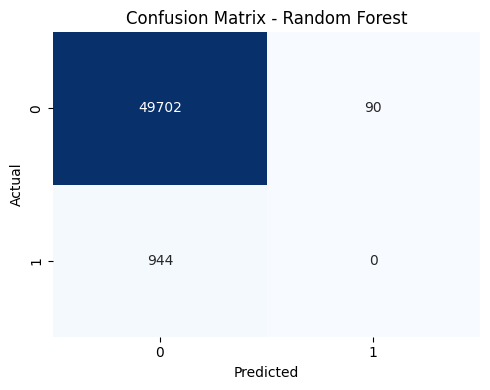


==== Evaluasi: K-Nearest Neighbors ====
Akurasi: 0.9813
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     49792
           1       0.00      0.00      0.00       944

    accuracy                           0.98     50736
   macro avg       0.49      0.50      0.50     50736
weighted avg       0.96      0.98      0.97     50736



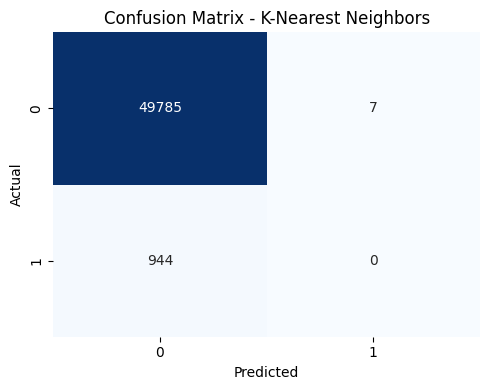


==== Evaluasi: Decision Tree ====
Akurasi: 0.9652
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     49792
           1       0.03      0.02      0.03       944

    accuracy                           0.97     50736
   macro avg       0.50      0.50      0.50     50736
weighted avg       0.96      0.97      0.96     50736



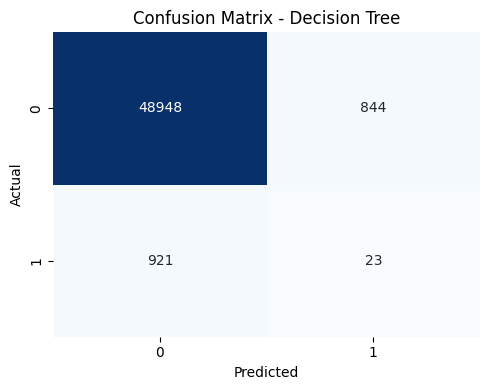

/tmp/ipython-input-11-2111017363.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=acc_df, x='Model', y='Accuracy', palette="viridis")


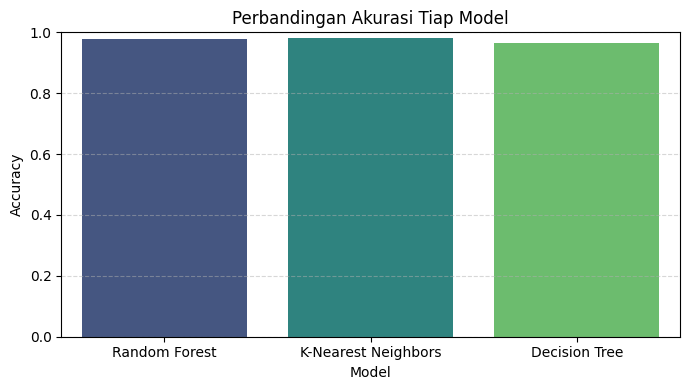

In [11]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Evaluasi semua model
model_accuracies = {}  # Untuk menyimpan akurasi tiap model

for name, model in trained_models.items():
    print(f"\n==== Evaluasi: {name} ====")

    # Prediksi
    y_pred = model.predict(X_test)

    # Akurasi
    acc = accuracy_score(y_test, y_pred)
    model_accuracies[name] = acc  # Simpan akurasi
    print(f"Akurasi: {acc:.4f}")

    # Classification Report
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)

    # Visualisasi Confusion Matrix
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()

# Visualisasi akurasi seluruh model
acc_df = pd.DataFrame({
    'Model': list(model_accuracies.keys()),
    'Accuracy': list(model_accuracies.values())
})

plt.figure(figsize=(7, 4))
sns.barplot(data=acc_df, x='Model', y='Accuracy', palette="viridis")
plt.ylim(0, 1)
plt.ylabel("Accuracy")
plt.title("Perbandingan Akurasi Tiap Model")
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


# Deploy Model Implementasi

## Menyimpan Model


In [ ]:
import streamlit as st
import joblib
from preprocessing import preprocess_input

# Load model
model = joblib.load("model/knn_model.pkl")

## Integrasi Model Dengan Web
install library Streamlit, dengan menjalankan perintah “pip install streamlit” pada terminal.

membuat file berekstensi .py, misal app.py.

didalam app.py saya panggil model yang telah disimpan.

setelah itu saya membuat tampilan informasi keterangan tentang inputan dan hasil evaluasi. selain itu saya juga membuat tampilan form untuk user menginputkan data yang akan diprediksi oleh model berserta tampilan untuk hasil prediksi. untuk tampilan saya masukkan code nya didalam file app.py juga, karena dimudahkan oleh library streamlit.

## Hasil Model



link web : https://curly-sniffle-7v75wvpgp7gxcxjxr-8501.app.github.dev/

link repo web : https://github.com/Malikzert/UASpendata

Tampilan aplikasi ini menyajikan form prediktif untuk mengestimasi risiko diabetes berdasarkan dataset CDC (Centers for Disease Control and Prevention). Di bagian atas, pengguna disambut dengan judul informatif "Prediksi Risiko Diabetes (CDC Dataset)" dan deskripsi singkat yang menjelaskan bahwa pengguna perlu mengisi data pribadi untuk mengetahui kemungkinan memiliki diabetes. Form diatur dalam tata letak dua kolom yang responsif, dengan pilihan dropdown biner (0/1) untuk fitur-fitur seperti "Tekanan Darah Tinggi", "Kolesterol Tinggi", "Pernah Stroke", dan sebagainya. Tiap label input disertai penjelasan jelas mengenai arti nilai 0 dan 1, sehingga pengguna awam pun bisa mengisi dengan mudah.

Bagian bawah form menyediakan tiga input numerik interaktif dalam bentuk slider dan number input untuk variabel numerik seperti BMI, jumlah hari tidak sehat secara mental dan fisik selama 30 hari terakhir, serta persepsi kesehatan umum (1 = sehat, 5 = buruk). Setelah seluruh data dimasukkan, pengguna dapat menekan tombol Prediksi yang akan menjalankan model K-Nearest Neighbors (KNN) di belakang layar dan menampilkan hasil apakah pengguna terindikasi Diabetes atau Tidak Diabetes. Tampilan ini menggabungkan desain bersih, fungsionalitas sederhana, dan pendekatan ramah pengguna berbasis machine learning.

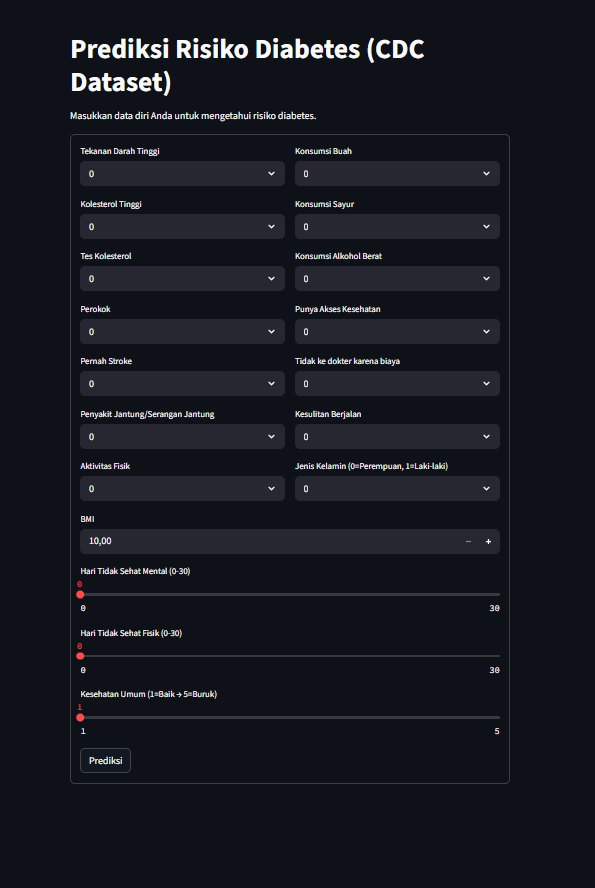